# Validación de Clusters

¿Existe una estructura real de agrupamiento en los datos? ¿Los grupos encontrados son buenos o malos?

Evaluar la calidad de nuestros clusters es algo no trivial. En 2 dimensiones podemos encontrar separaciones de clusters visualmente. El tema es que rara vez tendremos solo 2 dimensiones en nuestros datos. Para más dimensiones tenemos que depender de técnicas de reducción de dimensionalidad.

En esta sección veremos algunas forma de evaluar clusters, sea visual o numéricamente.

In [ ]:
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Dataset

Breast Cancer Wisconsin (Diagnostic): https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()    #print(bc.DESCR)
X = bc.data
y = bc.target

In [ ]:
#X = data.iloc[:,:-1]
#y = data['quality']

## Preprocesamiento y EDA

In [ ]:
#scale = StandardScaler()
scale = MinMaxScaler()
X = scale.fit_transform(X)
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


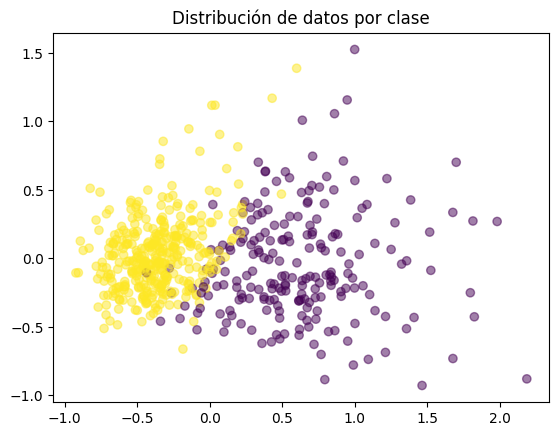

In [ ]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c=y)
plt.title("Distribución de datos por clase")
plt.show()

# K-Means



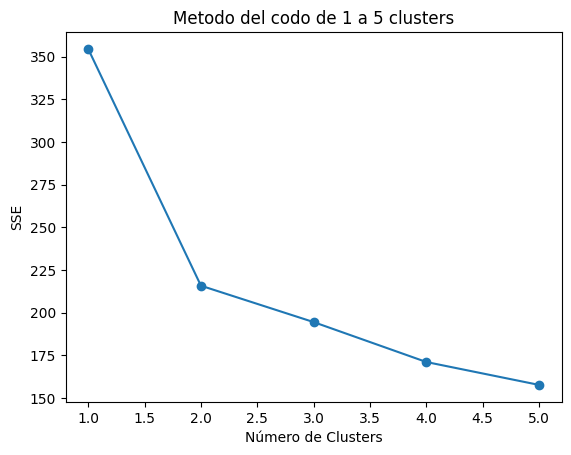

In [ ]:
SSE = []
numClusters = list(range(1, 6))
for k in numClusters:
    k_means = KMeans(n_clusters=k, n_init='auto')
    k_means.fit(X)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE, marker="o")
plt.title("Metodo del codo de 1 a 5 clusters")
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=50, random_state=1).fit(X)
kmeans_labels = kmeans.predict(X) #`fit_predict` entrena el modelo y devuelve las predicciones

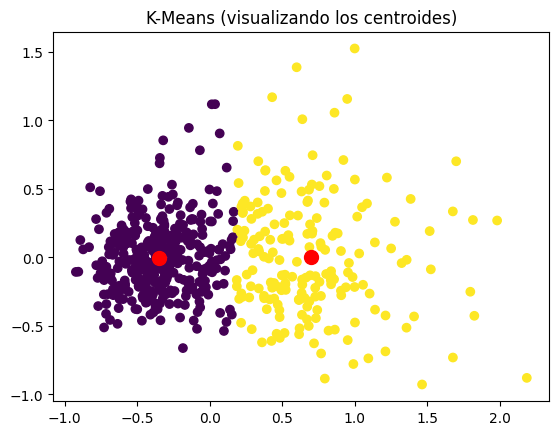

In [ ]:
# centroides resultantes del clustering
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=100, facecolors='r')
plt.title("K-Means (visualizando los centroides)")
plt.show();

# Clustering Jerárquico Aglomerativo

Criterios para unir los clusters:
* `complete`: considera la distancia máxima entre 2 clusters
* `average`: considera la distancia promedio entre 2 clusters
* `single`: considera la distancia mínima entre 2 clusters
* `ward`: minimiza la varianza entre los 2 clusters

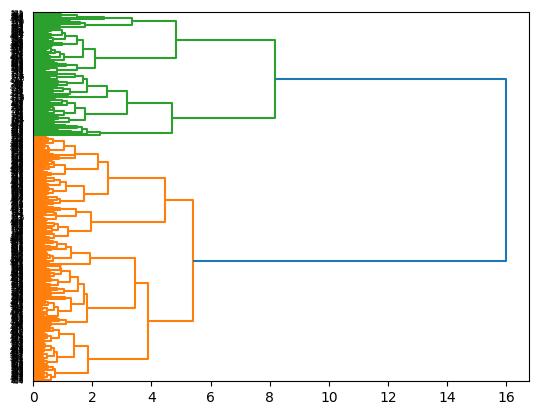

In [ ]:
# revisar funciones de distancia/similitud:
# euclidiana, manhattan o cityblock, correlacion, coseno

Z = linkage(X, 'ward', metric='euclidean') #matriz de similitud
dn = dendrogram(Z, orientation='right')

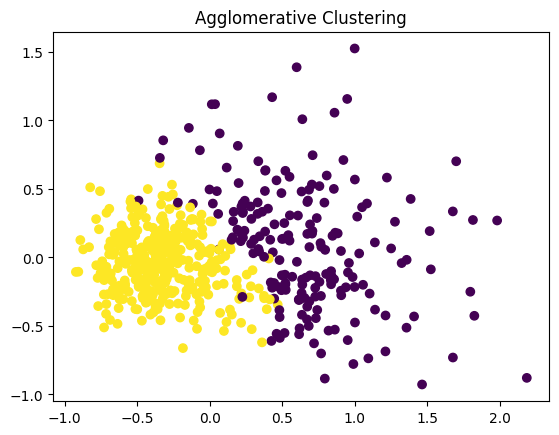

In [ ]:
agl_clusters = AgglomerativeClustering(linkage="ward",
                                        metric='euclidean',
                                        n_clusters=2).fit(X)

agglomerative_labels = agl_clusters.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels)
plt.title("Agglomerative Clustering")
plt.show()

# DBScan

Parametros `eps` y `min_samples`. `eps` corresponde a la distancia dentro de la cual se consideran 2 puntos vecinos, `min_samples` es el número de vecinos que tiene que tener un punto para ser considerado un punto _core_.

Esta implementación asocia los puntos de ruido al cluster ID con valor `-1`.

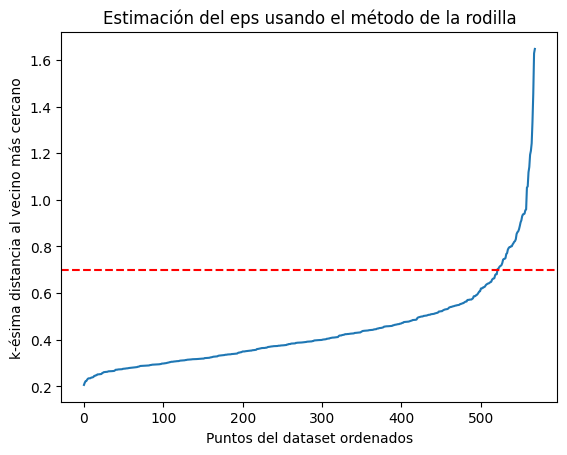

In [ ]:
N = 10
nbrs = NearestNeighbors(n_neighbors=N).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,N-1]
plt.plot(distances)
plt.axhline(y=0.7, color='r', linestyle='--') #Ajuste el valor para y
plt.title('Estimación del eps usando el método de la rodilla')
plt.xlabel('Puntos del dataset ordenados')
plt.ylabel('k-ésima distancia al vecino más cercano');

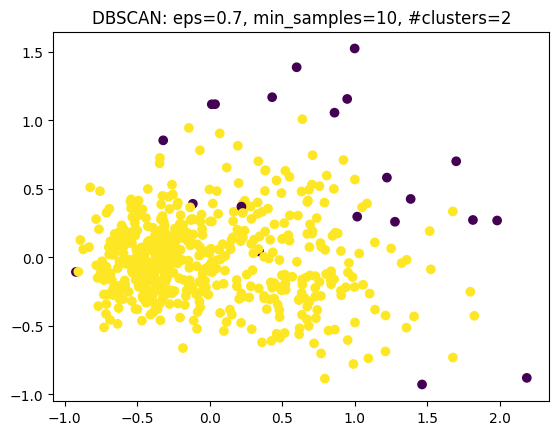

In [ ]:
eps = 0.7
min_samples = 10

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
dbscan_labels = dbscan.labels_

plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}, #clusters={len(np.unique(dbscan.labels_))}")
plt.show()


#Habría que seguir explorando los parámetros, en este caso solo identificamos un cluster (+ ruido)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0])

# Evaluación

## Matriz de similitud (proximidad)

Estas matrices nos permiten ver qué tan cerca están los puntos pertenecientes a un cluster entre sí, y simultaneamente ver qué tan lejos están los puntos de un cluster de los otros clusters.

In [ ]:
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las distancias entre todos los puntos
    d = euclidean_distances(sorted_features, sorted_features)
    return d

def plot(data, labels):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    ax1.scatter(data[:,0], data[:,1], c=labels)

    dist = sim_matrix(data, labels)
    im = ax2.imshow(dist, cmap="jet")
    fig.colorbar(im, ax=ax2)

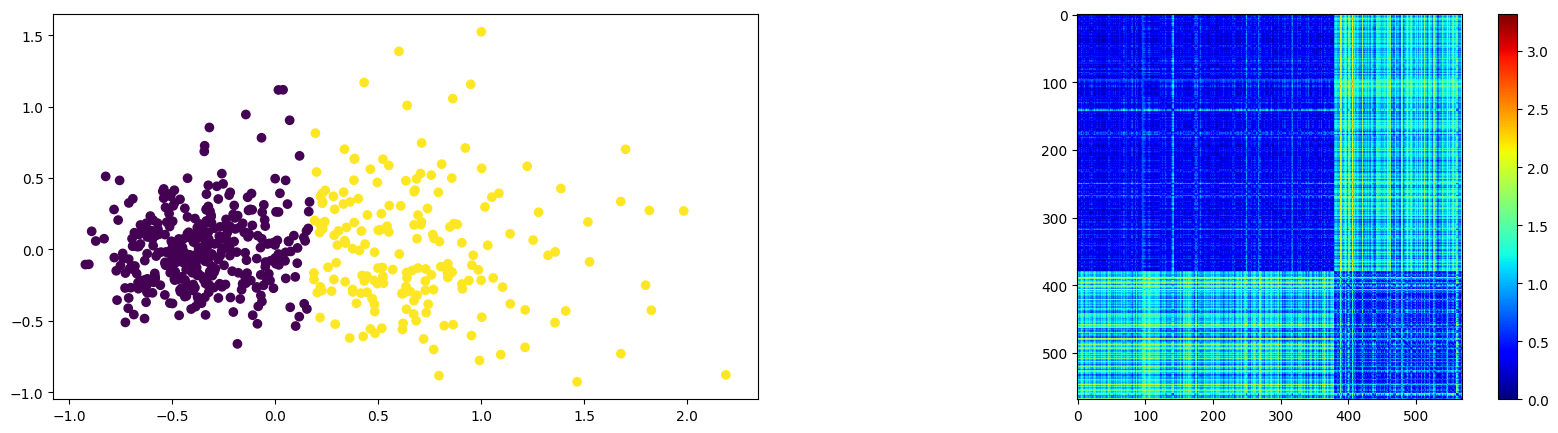

In [ ]:
plot(X_pca, kmeans_labels)
plt.show()

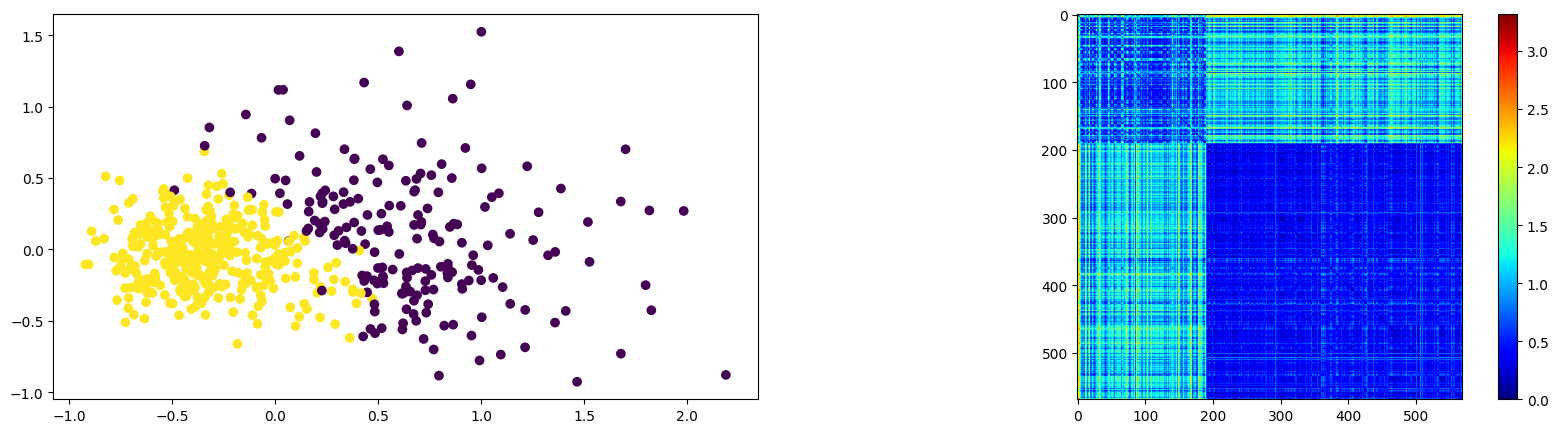

In [ ]:
plot(X_pca, agglomerative_labels)
plt.show()

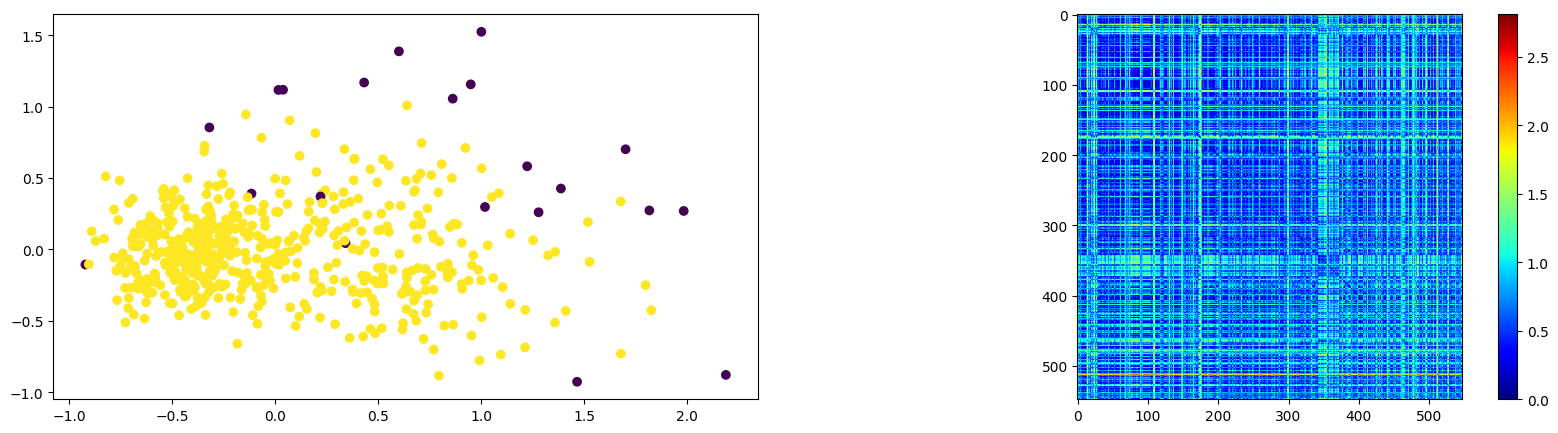

In [ ]:
plot(X_pca, dbscan_labels) #solo identificamos 1 cluster
plt.show()

## Silhouette

Presentaremos otra forma de evaluar clusters, esta vez de una manera no visual usando el coeficiente de Silhouette. Este coeficiente calcula para cada punto:

1) su distancia promedio al resto de los puntos en su misma clases, digamos `a`. En ingles esto se llama `mean intra-cluster distance`.

2) su distancia promedio a todos los puntos del cluster mas cercano, digamos `b`. En ingles esto se llama `mean nearest-cluster distance`.
Entonces el coeficiente de Silhouette se calcula con la siguiente formula:
$$\frac{b - a}{max(a, b)}$$

Esta métrica esta en un rango entre -1 y 1, donde:

* 1 significa que algo está bien asignado,
* -1 significa que algo está mal asignado porque hay otro cluster más similar, y
* 0 significa que hay solapamiento de clusters.

In [ ]:
print("K-Means\t", silhouette_score(X, kmeans.labels_))

K-Means	 0.3845494883485513


In [ ]:
print("Agglomerative\t", silhouette_score(X, agl_clusters.labels_))

Agglomerative	 0.36706054267114924


In [ ]:
# para DBSCAN tenermos que filtrar las labels negativas, ya que representan ruido, no otro cluster
#_filter_label = dbscan.labels_ >= 0
#print("DBSCAN\t", silhouette_score(X[_filter_label], dbscan.labels_[_filter_label]))

#en este caso solo identificamos un cluster

## Información mutua

Si tenemos el label verdadero de cada cluster (casi nunca), podemos aplicar otras técnicas para evaluar los clusters que obtenemos. Una de esas otras técnicas es la Infomación Mutua, que básicamente ve la dependencia entre 2 distribuciones, nuestra distribucion real que conocemos (que casi nunca tenemos), y la que nos dio nuestro método de clustering. Para más detalles y la formulación mátematica vean el siguiente link: https://scikit-learn.org/stable/modules/clustering.html#id12

`sklearn` presenta 3 versiones de este concepto, Mutual Information (MI), Normalized Mutual Information (NMI), y Adjusted Mutual Information (AMI). La primera es un valor que mide la información mutua pero no está acotado entonces no sabemos que tan bueno o malo es teniendo solo el valor aislado. NMI y AMI están normalizados en el rango 0-1, así que es más fácil tener una idea de que significa el número. Los valores cercanos a 1 indican una buena agrupación.

In [ ]:
print("K-Means\t", normalized_mutual_info_score(y, kmeans.labels_))


K-Means	 0.6230860242027795


In [ ]:
print("Agglomerative\t", normalized_mutual_info_score(y, agl_clusters.labels_))


Agglomerative	 0.4169648665127625


In [ ]:
_filter_label = dbscan.labels_ >= 0
print("DBSCAN\t", normalized_mutual_info_score(y[_filter_label], dbscan.labels_[_filter_label]))

DBSCAN	 0.0
